# Entanglement Classifier Trial Notebook

### Importing Dependencies

In [4]:
import numpy as np
from sympy.physics.quantum import TensorProduct

from components.system import System
from components.interaction import InteractionFactory, Interaction
from components.model import Model
from components.interaction_functions import CascadeFunction, EnergyExchangeFunction, DampingFunction
from components.state_generator import generatePureState, generateMixedState, generateMixedStateUsingPure

### Setting up the system

In [5]:
reservoir_nodes=2
system_nodes=2

In [24]:
"""
Defining System setup
"""
random_num = np.random.rand()

if random_num >= 0.5:
    system_state = generateMixedStateUsingPure(dim=2**system_nodes)
elif random_num < 0.5:
    system_state = generatePureState(dim=2**system_nodes)
system_node_list = [0, 1]

if len(system_node_list) != system_nodes:
    raise Exception

system_interactions = {"sys_interaction_0" : Interaction(0, DampingFunction(0, reservoir_nodes+system_nodes, 1)),
                       "sys_interaction_1" : Interaction(1, DampingFunction(1, reservoir_nodes+system_nodes, 1))}

system = System(
    init_quantum_state=system_state, nodes=system_node_list, interactions=system_interactions
)

### Setting up the interface

In [25]:

"""
Defining Interface setup
"""

interfaceFactory1 = InteractionFactory(CascadeFunction, gamma_1=1, gamma_2=1)
interfaceFactory2 = InteractionFactory(CascadeFunction, gamma_1=0, gamma_2=0)

### Setting up the reservoir

In [26]:
"""
Defining Reservoir setup
"""

reservoirFactory1 = InteractionFactory(EnergyExchangeFunction, coupling_strength=0.5)
reservoirFactory2 = InteractionFactory(DampingFunction, damping_strength=0.5)

### Setting up the model

In [27]:
model = Model()
model.setSystem(system)
model.setReservoirInteractionFacs(dualFactories=[reservoirFactory1], singleFactories=[reservoirFactory2])
model.setInterfaceInteractionFacs([[interfaceFactory1, interfaceFactory2]])
model.generateReservoir(reservoir_nodes, init_quantum_state=0, interaction_rate=1)
model.generateInterface(interaction_rate=.5)
model.setRunDuration(10)
model.setRunResolution(0.001)
model.setSwitchStructureTime(2)


### Running the model

In [28]:
pure_state = np.array([[0.5, 0.5], [0.5, 0.5]])
mixed_state = np.array([[0.5, 0], [0, 0.5]])

In [29]:
model.system.init_quantum_state = generatePureState(dim=4)
model.run()

In [30]:
log1 = model.modelLog

### Plotting results

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


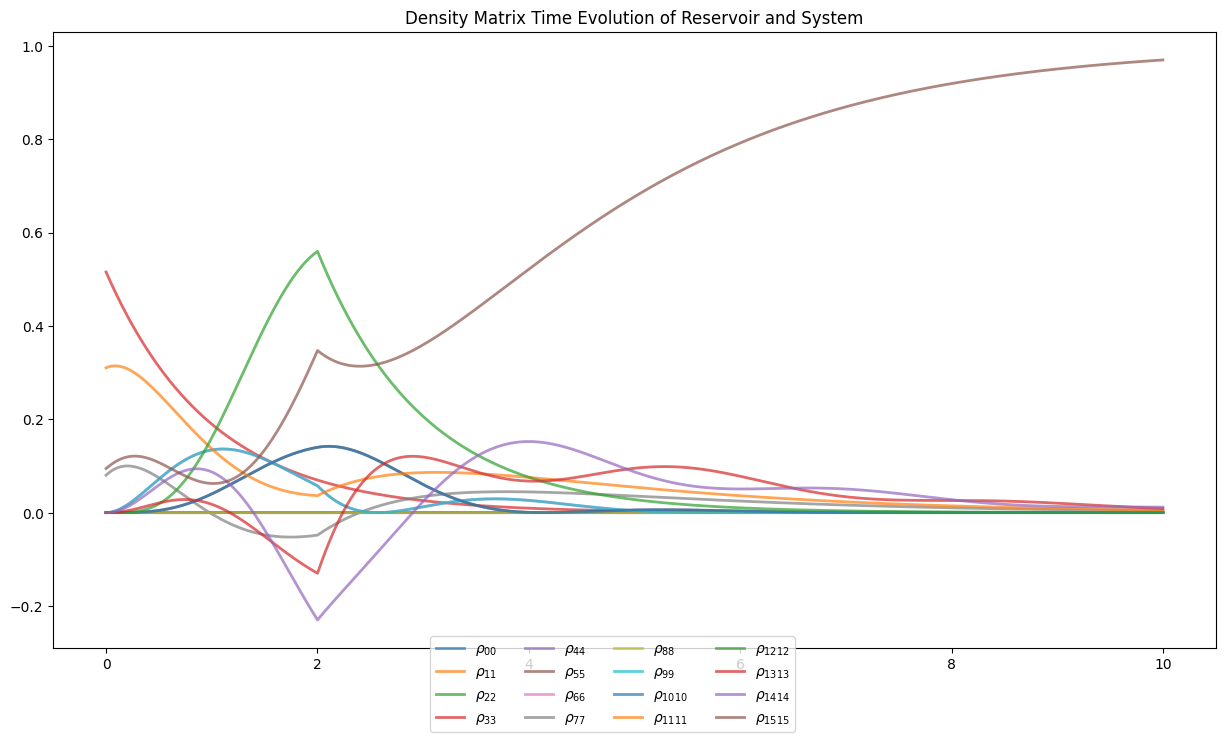

In [31]:
log1.plotResAndSys()

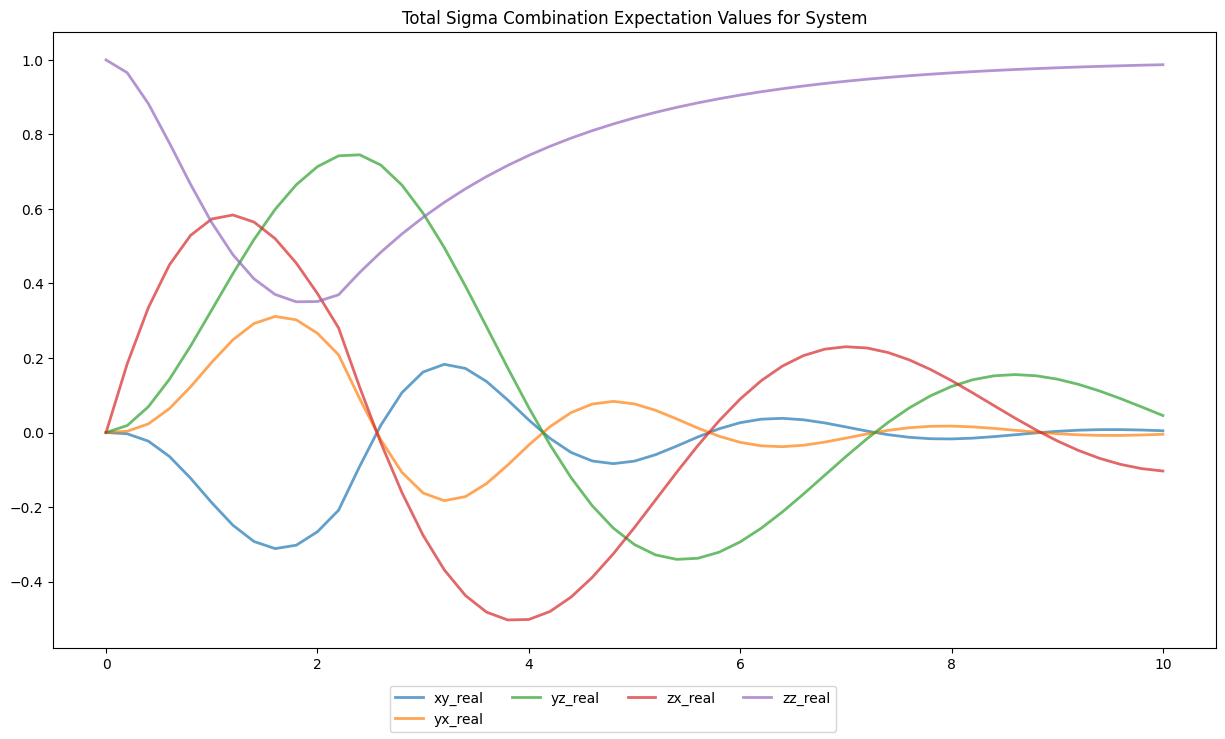

In [334]:
log1.plotSigmaCombinations()